In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn # для построения матрицы корреляций
import sklearn

In [2]:
data0 = pd.read_excel('df_final_2.xlsx')
data0

,id,PPS_ID,DOCU,TCART,H,ADAY,ATIME,PIECE_ID,HEAT_ID,BATCH,...,H_H2,H_O2,H_FER,H_ALN,HEAD_TENS_ORDER_DATE,HEAD_TENS_CREATION_DATE,HEAD_IB_ORDER_DATE,HEAD_IB_CREATION_DATE,HEAD_DWTT_ORDER_DATE,HEAD_DWTT_CREATION_DATE
0,121034,17003331-100000,ГОСТ 19281-2014,NaN,25.0,2017-02-09 19:49:41,19:49:41,2.017021e+15,1751597.0,1700349,...,0.0002,0.0010,NaN,13.85,2017-02-14 13:29:25,2017-02-14 21:04:36,2017-02-14 13:30:08,2017-02-17 09:18:20,NaT,NaT
1,121035,17003331-400000,ГОСТ 19281-2014,NaN,25.0,2017-02-09 20:01:23,20:01:23,2.017021e+15,1751597.0,1700349,...,0.0002,0.0010,NaN,13.85,NaT,NaT,NaT,NaT,NaT,NaT
2,121036,17003331-300000,ГОСТ 19281-2014,NaN,25.0,2017-02-09 20:09:12,20:09:12,2.017021e+15,1751597.0,1700349,...,0.0002,0.0010,NaN,13.85,NaT,NaT,NaT,NaT,NaT,NaT
3,121037,17003331-200000,ГОСТ 19281-2014,РП.20-58.201.19281-112_ред.0,25.0,2017-02-09 20:52:22,20:52:22,2.017021e+15,1751597.0,1700349,...,0.0002,0.0010,NaN,13.85,2017-02-14 13:25:37,2017-02-14 21:03:54,2017-02-14 13:27:29,2017-02-17 14:42:54,NaT,NaT
4,121038,17003339-100000,ГОСТ 19281-2014,NaN,30.0,2017-02-09 21:00:18,21:00:18,2.017021e+15,1751597.0,1700350,...,0.0002,0.0010,NaN,13.85,2017-02-14 10:39:59,2017-02-14 21:05:19,2017-02-14 10:53:05,2017-02-17 09:17:48,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10403,280776,21003326-200000,ГОСТ 19281-2014,ТК.20-500.201.62_ред.2,16.0,2021-02-20 21:40:50,21:40:50,2.021022e+15,2152360.0,2100631,...,0.0003,0.0016,NaN,13.57,NaT,NaT,NaT,NaT,NaT,NaT
10404,301803,21009912-120000,ГОСТ 19281-2014,ТК.20-500.201.62_ред.2,10.0,2021-08-06 21:29:46,21:29:46,2.021081e+15,2158531.0,2104020,...,0.0004,0.0023,NaN,7.67,2021-08-07 00:30:12,2021-08-07 06:16:04,2021-08-07 00:30:12,2021-08-07 06:16:04,NaT,NaT
10405,301804,21009912-110000,ГОСТ 19281-2014,ТК.20-500.201.62_ред.2,10.0,2021-08-06 21:35:05,21:35:05,2.021081e+15,2158531.0,2104020,...,0.0004,0.0023,NaN,7.67,2021-08-07 00:31:25,2021-08-07 06:16:37,2021-08-07 00:31:25,2021-08-07 06:16:37,NaT,NaT
10406,301805,21009912-220000,ГОСТ 19281-2014,ТК.20-500.201.62_ред.2,10.0,2021-08-06 21:40:43,21:40:43,2.021081e+15,2158531.0,2104021,...,0.0004,0.0023,NaN,7.67,2021-08-07 00:32:12,2021-08-07 07:48:53,2021-08-07 00:32:12,2021-08-07 07:48:53,NaT,NaT


### Предобработка входных переменных Х

In [3]:
data1=pd.DataFrame()
data1[["H","R_S","R_MIN","R_MAX","R_NUM","PODKAT","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_MAX","F_E","LP_T","ACCENTEMP2","ACCENTEMP3","ACCLAMICR2", 
       "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]] = data0[["H","R_S","R_MIN","R_MAX","R_NUM","PODKAT","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_MAX","F_E","LP_T","ACCENTEMP2","ACCENTEMP3","ACCLAMICR2", "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]]

In [4]:
data1.describe()
pd.set_option('display.max_columns', None)

In [5]:
data1.describe()


,H,R_S,R_MIN,R_MAX,R_NUM,PODKAT,F_NUM,S_H,FURNT,FURTIME,FURTOMZ,R_E,F_S,F_MIN,F_MAX,F_E,LP_T,ACCENTEMP2,ACCENTEMP3,ACCLAMICR2,B_FL_RM,B_FL_YSL,B_FL_A5_TOT,BM20VA,BM40VA,BM60UA
count,10408.000000,10406.000000,10406.000000,10406.000000,10406.000000,10406.000000,10406.000000,10402.000000,10402.000000,10402.000000,10402.000000,10325.000000,10367.000000,10367.000000,10367.000000,10364.000000,10364.000000,8319.000000,8.000000,8320.000000,2279.000000,2270.000000,2279.000000,547.000000,1235.000000,158.000000
mean,17.376595,1000.647271,7.415842,16.287880,13.574668,68.442263,9.505958,275.209575,1178.172121,389.741396,73.136897,920.267361,829.927713,11.615918,15.751589,767.123939,751.512196,742.603101,767.162500,11.133546,531.735410,410.742731,28.264590,247.146252,195.090283,226.753165
std,6.858057,8.285297,1.679267,2.878737,1.896999,19.987387,1.872308,37.788779,5.527897,106.876165,35.961758,184.215188,46.235861,1.867472,2.802206,31.424555,23.414725,34.762319,19.346313,1.312461,17.740093,21.369112,2.143958,64.660515,70.858387,66.178651
min,8.000000,931.300000,3.060000,3.270000,2.000000,26.993500,0.000000,140.000000,1090.600000,202.000000,21.000000,0.000000,737.100000,3.040000,6.070000,0.000000,633.600000,651.300000,745.800000,3.300000,475.000000,315.000000,17.500000,44.000000,29.000000,94.000000
25%,16.000000,996.100000,6.470000,13.980000,12.000000,59.997100,9.000000,250.000000,1177.100000,312.000000,55.000000,940.300000,799.100000,10.620000,13.320000,754.700000,740.100000,732.900000,749.600000,10.400000,520.000000,395.000000,27.000000,200.500000,143.750000,176.250000
50%,16.000000,1001.200000,7.030000,16.030000,14.000000,64.000600,9.000000,250.000000,1178.900000,365.000000,67.000000,955.000000,822.500000,11.510000,15.810000,758.100000,744.900000,737.100000,766.400000,11.000000,530.000000,415.000000,28.000000,246.000000,185.000000,212.500000
75%,20.000000,1005.500000,7.980000,18.120000,14.000000,80.998875,11.000000,310.000000,1180.700000,443.000000,85.000000,970.400000,839.400000,12.700000,17.380000,765.700000,751.600000,742.200000,781.475000,11.800000,540.000000,425.000000,30.000000,289.500000,237.250000,271.750000
max,260.000000,1075.000000,17.040000,31.110000,20.000000,256.795500,17.000000,355.000000,1250.600000,1220.000000,969.000000,1065.800000,1016.200000,22.940000,30.100000,939.100000,1044.600000,1600.000000,793.800000,21.900000,620.000000,500.000000,52.000000,437.000000,513.000000,428.000000


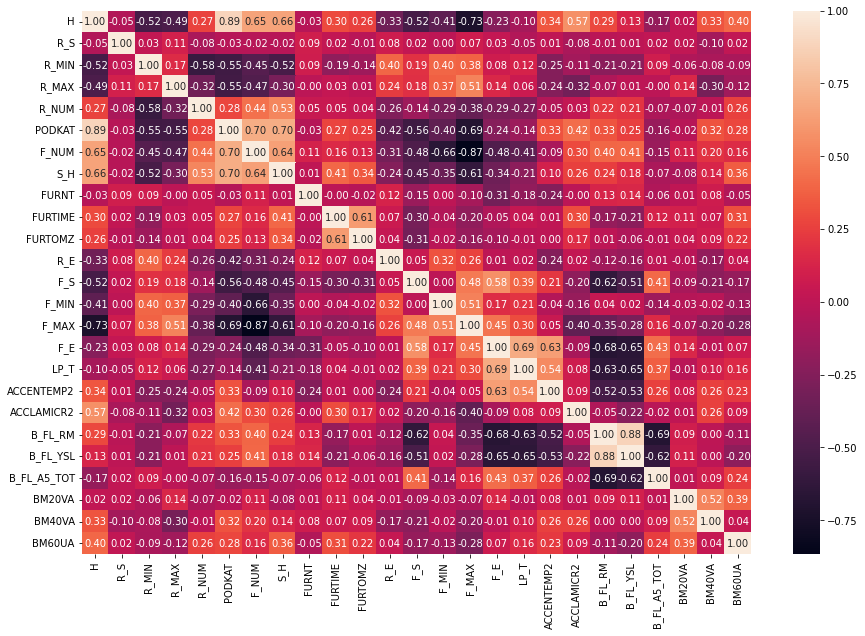

In [6]:
# строим матрицу корреляций - там где значения близкие к 1, то данные связаны между собой - 
# используем это в дальнейшем анализе (их нельзя разделять, то есть нельзя удалить из дата фрейма один из этих связанных столбцов)
data_cor = pd.DataFrame()
data_cor[["H","R_S","R_MIN","R_MAX","R_NUM","PODKAT","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_MAX","F_E","LP_T","ACCENTEMP2","ACCLAMICR2", 
       "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]]=data1[["H","R_S","R_MIN","R_MAX","R_NUM","PODKAT","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_MAX","F_E","LP_T","ACCENTEMP2","ACCLAMICR2", 
       "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]] 
plt.figure(figsize = (15,10))
seaborn.heatmap(data_cor.corr(method = 'spearman'),annot=True,fmt='.2f')

In [7]:
# на матрице корреляций видим, что показания "Н" и "PODKAT" коррелируют между собой (0.77). Удаляем PODKAT, F_MAX из входных переменных. 
data1=pd.DataFrame()
data1[["H","R_S","R_MIN","R_MAX","R_NUM","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_E","LP_T","ACCENTEMP2","ACCENTEMP3","ACCLAMICR2", 
       "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]] = data0[["H","R_S","R_MIN","R_MAX","R_NUM","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_E","LP_T","ACCENTEMP2","ACCENTEMP3","ACCLAMICR2", 
       "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]]

Удаляем показания (строки) ACCENTEMP2 и ACCLAMICR2, если присутствуют показания ACCENTEMP3	ACCLAMICR3	

In [8]:
data1 = data1.drop(np.where(np.isnan(data1['ACCENTEMP3']) != True)[0])
# print(data1['ACCENTEMP3'])
del data1['ACCENTEMP3']

In [9]:
data1=pd.DataFrame()
data1[["H","R_S","R_MIN","R_MAX","R_NUM","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_E","LP_T",
       "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]] = data0[["H","R_S","R_MIN","R_MAX","R_NUM","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_E","LP_T",
       "B_FL_RM", "B_FL_YSL","B_FL_A5_TOT", "BM20VA", "BM40VA","BM60UA"]]


### работа с выбросами

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(0.0, 100.0)

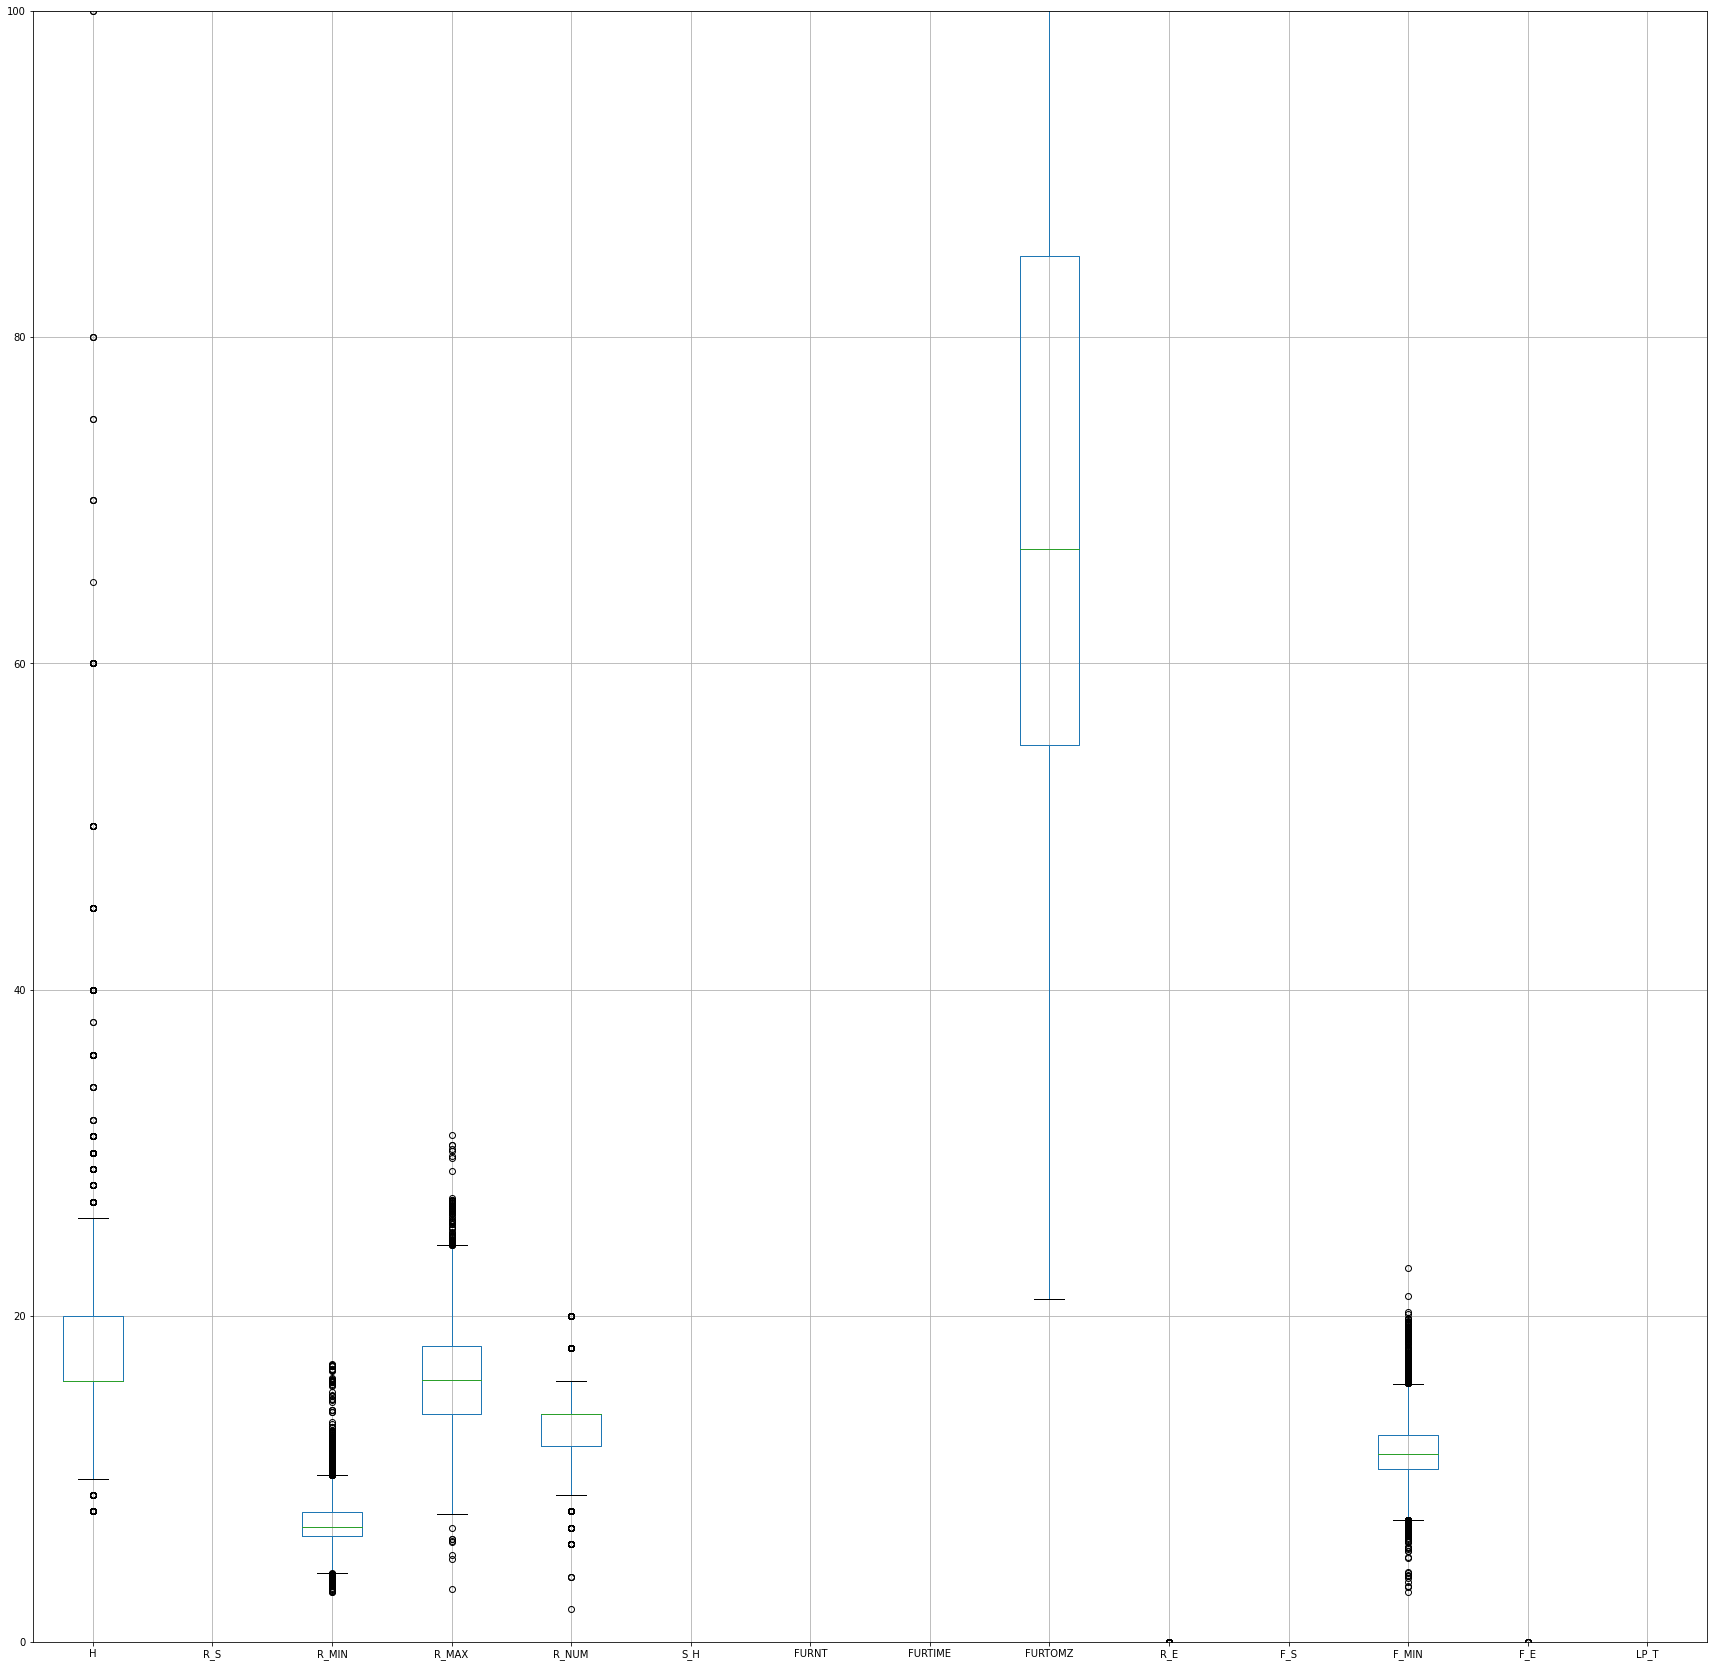

In [10]:
# проверяем выбросы, после исключим эти строки (регрессия очень чувствительна к выбросам)
numeric_col = ["H","R_S","R_MIN","R_MAX","R_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_E","LP_T"]
ax = plt.figure(figsize=(30,30))
ax = data1.boxplot(numeric_col)
ax.set_ylim(0,100)

(0.0, 1000.0)

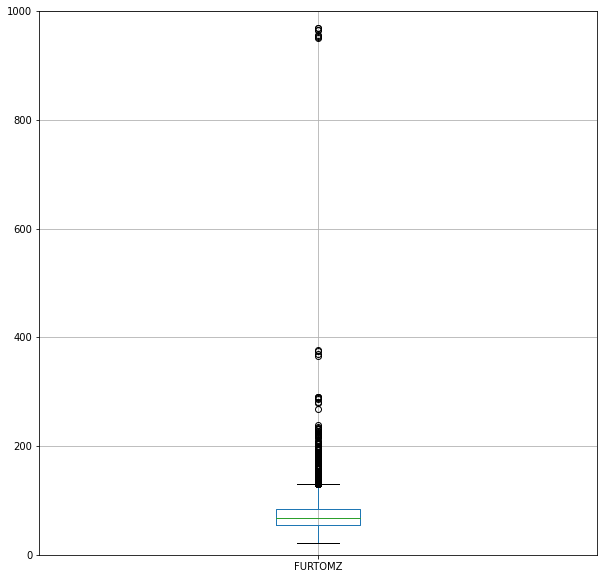

In [11]:
ax = plt.figure(figsize=(10,10))
ax = data1.boxplot('FURTOMZ')
ax.set_ylim(0,1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2db5265150>,
      dtype=object)

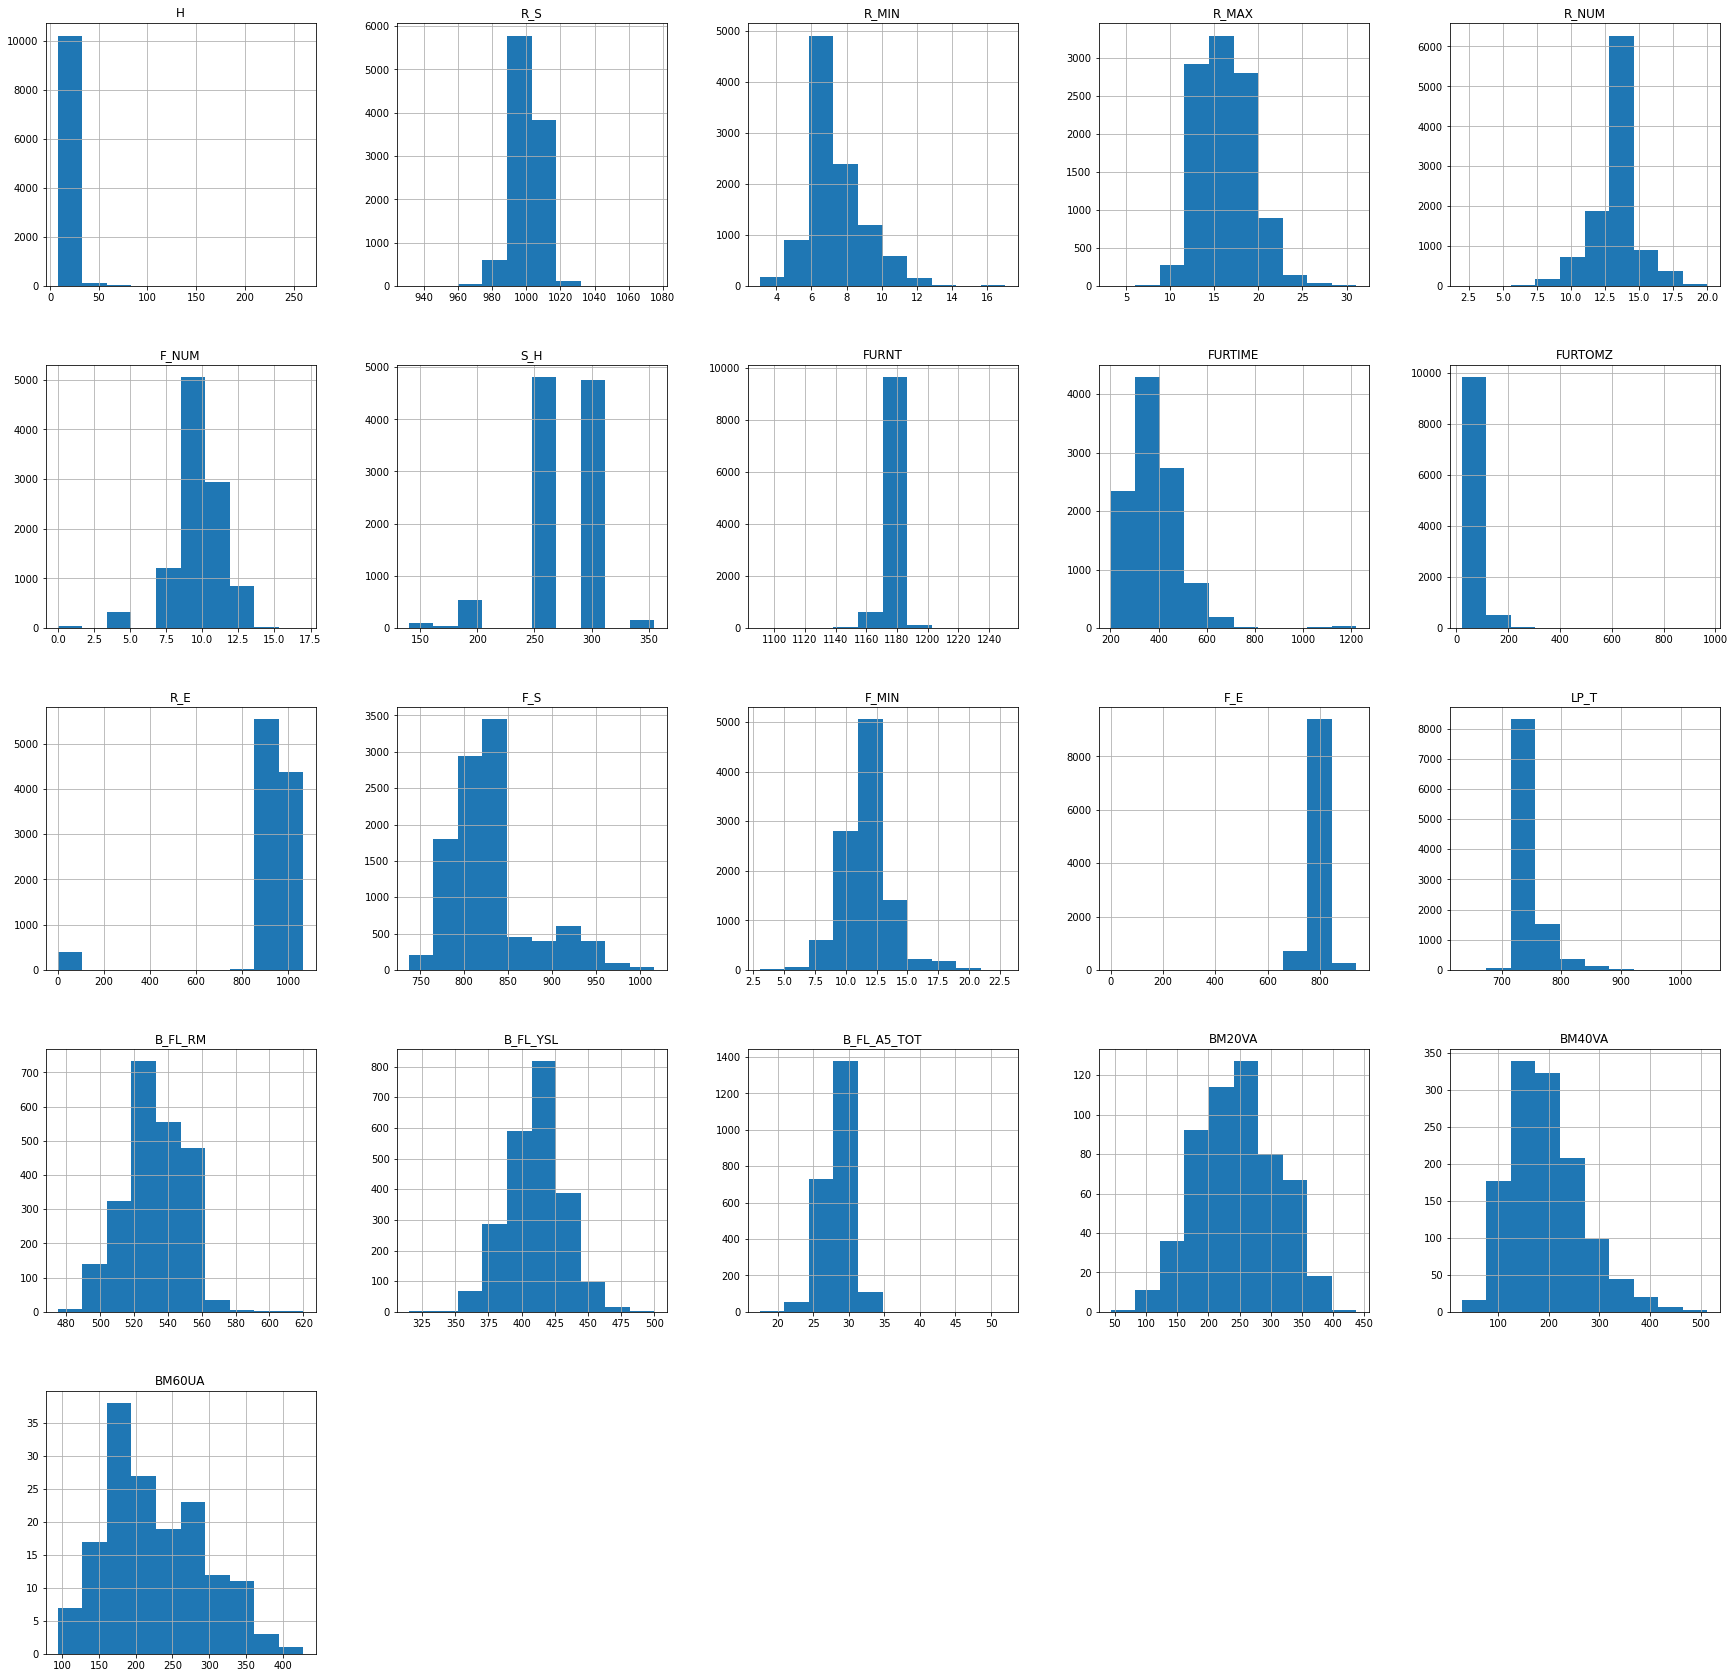

In [12]:
# строим гистограммы, проверяем разброс значений
fig = plt.figure(figsize = (30,30))
ax = fig.gca()
data1.hist(ax = ax)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(0.0, 500.0)

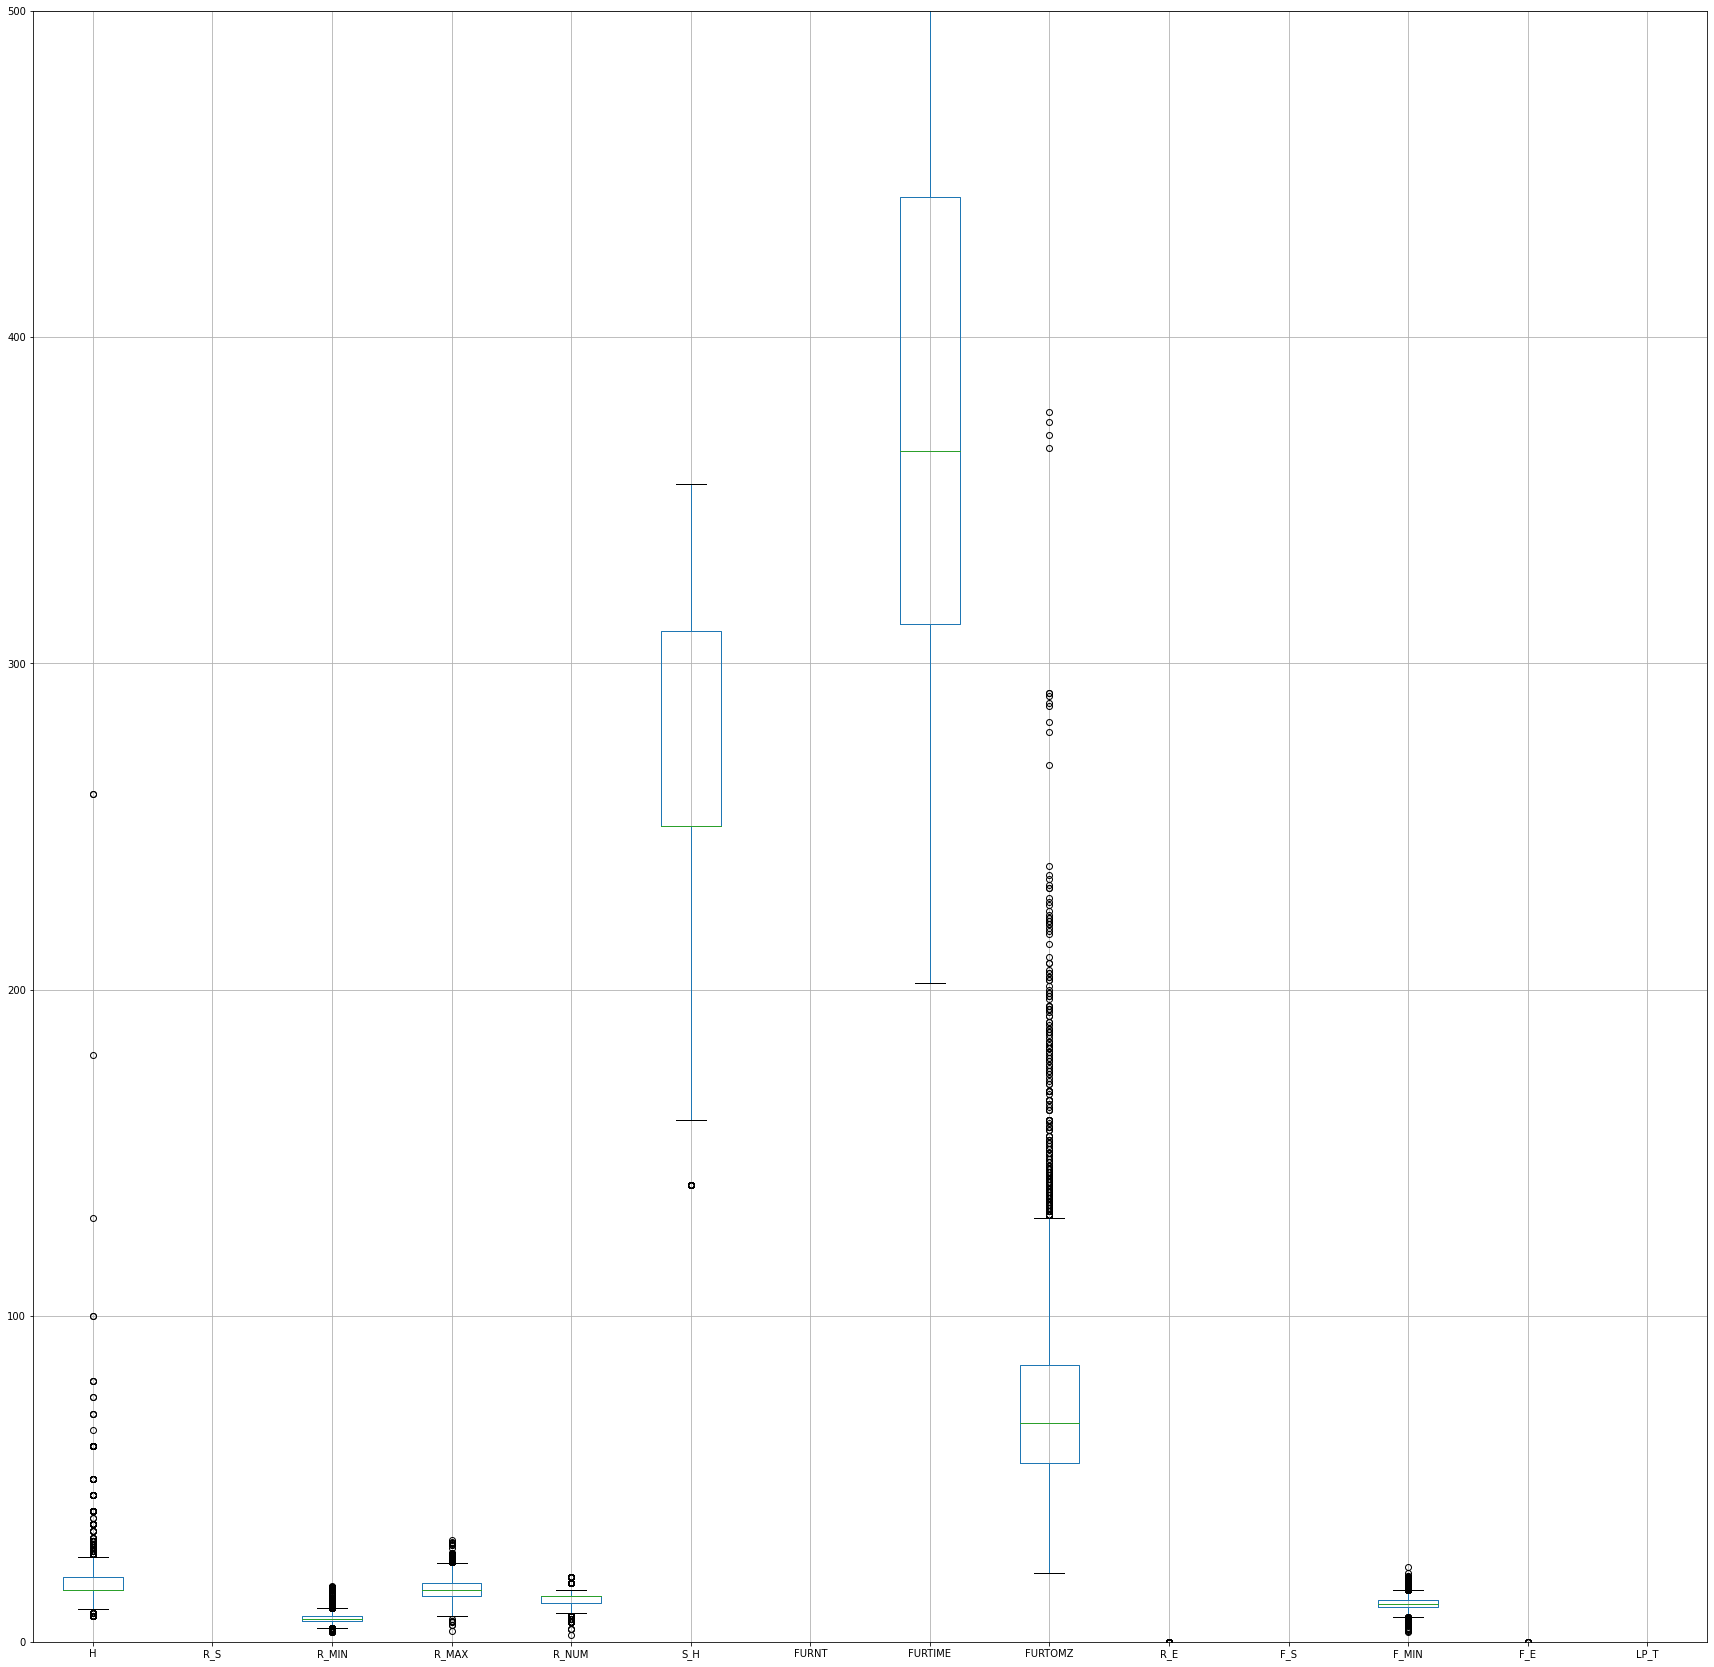

In [13]:
# проверяем выбросы, после исключим эти строки (регрессия очень чувствительна к выбросам)
numeric_col = ["H","R_S","R_MIN","R_MAX","R_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_E","LP_T"]
ax = plt.figure(figsize=(30,30))
ax = data1.boxplot(numeric_col)
ax.set_ylim(0,500)

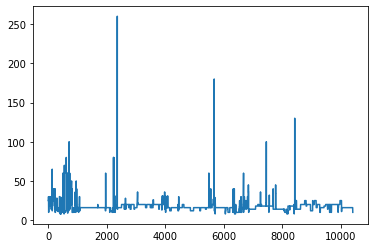

In [14]:
# номинальная толщина плиты с выбросами на графике. 
# вручную исключаем выбросы 'Н', так как метод IQR сильно уменьшает диапазон показаний, исключая и хорошие значения 
data1.H.plot() 

In [15]:
#data1 = data1.drop(np.where(data1['H'] > 50)[0])
# for x in data1["H"]:
#     if x>90:
#       print(x)

# data1.H.plot() 

In [16]:
# Исключаем выбросы с помощью метода IQR
# расчет 1 и 3 квантиля и межквартильный диапазон

df_IQR_new = data1.copy(deep=True)
for i in numeric_col:
  Q1 =  df_IQR_new[i].quantile(0.1)
  Q3 = df_IQR_new[i].quantile(0.9)
  IQR = Q3 - Q1 
  df_IQR_new = df_IQR_new[(df_IQR_new[i] >= Q1-1.5*IQR) & (df_IQR_new[i] <= Q3+1.5*IQR)]  

(0.0, 1000.0)

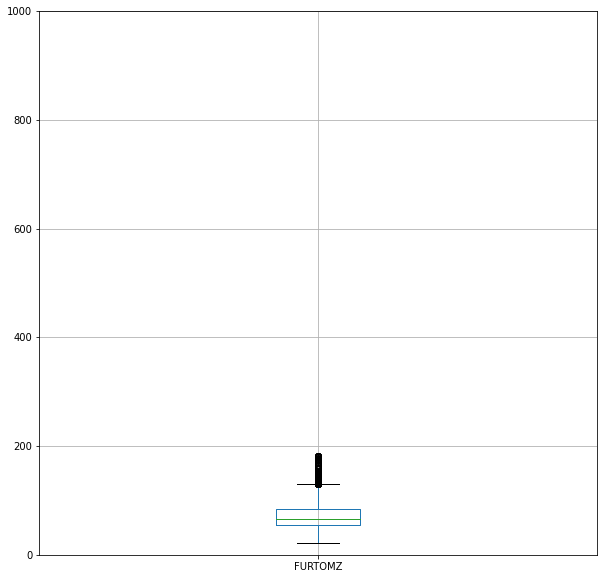

In [17]:
ax = plt.figure(figsize=(10,10))
ax =  df_IQR_new.boxplot('FURTOMZ')
ax.set_ylim(0,1000)

In [18]:
#data1.head()
# df_IQR_new.head()
df_IQR_new.describe()

,H,R_S,R_MIN,R_MAX,R_NUM,F_NUM,S_H,FURNT,FURTIME,FURTOMZ,R_E,F_S,F_MIN,F_E,LP_T,B_FL_RM,B_FL_YSL,B_FL_A5_TOT,BM20VA,BM40VA,BM60UA
count,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,1996.000000,1991.000000,1996.000000,524.000000,1056.000000,130.000000
mean,16.435955,1000.913607,7.450362,16.428512,13.684154,9.586696,275.090860,1178.998864,380.481233,70.950892,957.502888,827.980617,11.618515,763.088556,747.365668,532.815631,412.767454,28.228958,248.185115,193.276989,225.030769
std,3.145943,7.255242,1.517692,2.716715,1.596382,1.591904,35.479231,3.060239,85.057847,22.337406,20.851852,45.192153,1.561207,17.211759,14.979594,17.054772,20.406686,1.972348,63.229635,69.293193,67.260680
min,8.000000,964.500000,3.060000,9.360000,6.000000,5.000000,160.000000,1163.300000,202.000000,21.000000,848.500000,737.300000,6.120000,731.900000,683.400000,475.000000,355.000000,21.500000,106.000000,68.000000,113.000000
25%,16.000000,996.700000,6.530000,14.160000,14.000000,9.000000,250.000000,1177.400000,306.000000,55.000000,943.000000,797.800000,10.760000,754.400000,739.700000,520.000000,400.000000,27.000000,201.750000,143.000000,174.250000
50%,16.000000,1001.300000,7.070000,16.170000,14.000000,9.000000,250.000000,1179.100000,360.000000,66.000000,956.200000,820.800000,11.510000,757.400000,744.200000,540.000000,415.000000,28.000000,247.000000,182.750000,208.500000
75%,18.000000,1005.400000,7.970000,18.200000,14.000000,11.000000,310.000000,1180.800000,435.000000,85.000000,971.200000,837.500000,12.620000,763.200000,749.400000,540.000000,425.000000,30.000000,290.000000,231.250000,271.000000
max,32.000000,1032.200000,15.320000,28.900000,20.000000,15.000000,355.000000,1192.000000,752.000000,182.000000,1027.900000,1012.000000,18.580000,859.000000,823.100000,580.000000,490.000000,52.000000,396.000000,513.000000,428.000000


(0.0, 20.0)

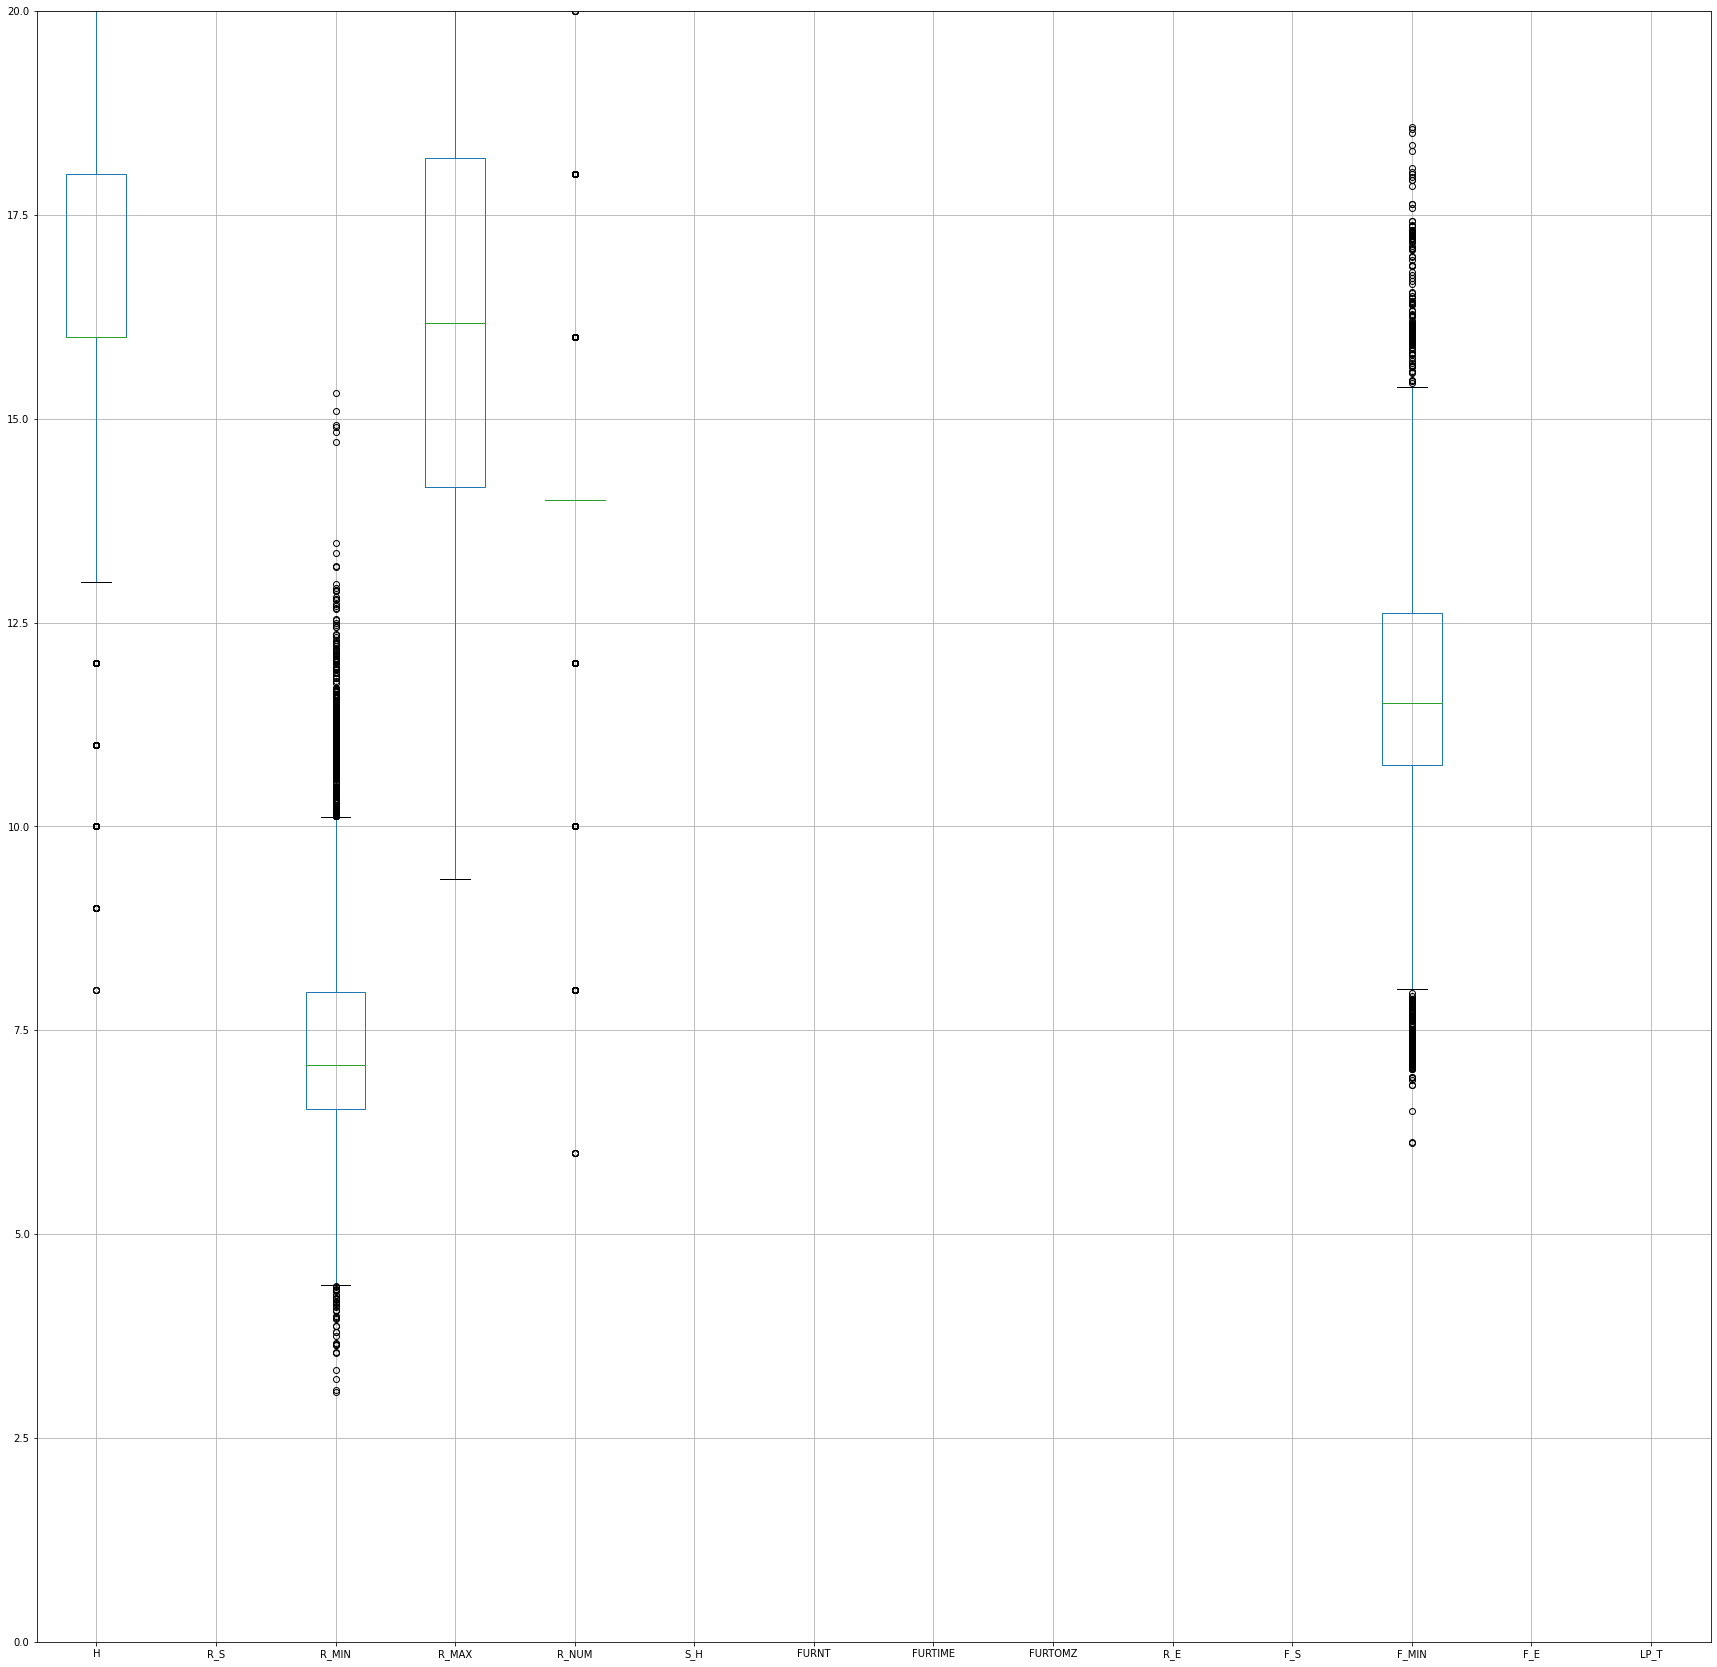

In [19]:
# убеждаемся, что все значения в своих "коробках"
ax = plt.figure(figsize=(30,30))
ax = df_IQR_new.boxplot(numeric_col)
ax.set_ylim(0,20)

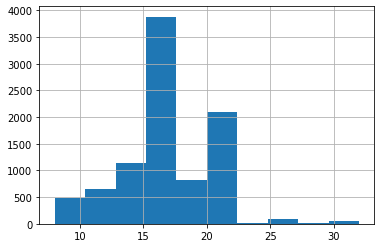

In [20]:
df_IQR_new.H.hist() 

In [21]:
# сколько показаний отсутствует
data1.isna().sum()

H                  0
R_S                2
R_MIN              2
R_MAX              2
R_NUM              2
F_NUM              2
S_H                6
FURNT              6
FURTIME            6
FURTOMZ            6
R_E               83
F_S               41
F_MIN             41
F_E               44
LP_T              44
B_FL_RM         8129
B_FL_YSL        8138
B_FL_A5_TOT     8129
BM20VA          9861
BM40VA          9173
BM60UA         10250
dtype: int64

In [22]:
df_IQR_new_FURTIME = df_IQR_new['FURTIME'].copy(deep=True)
df_IQR_new_FURTIME_1000 = df_IQR_new_FURTIME[0:999] 

In [23]:
import scipy
stat, p = scipy.stats.shapiro(df_IQR_new_FURTIME_1000) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.912, p-value=0.000
Отклонить гипотезу о нормальности


In [24]:
# восстанавливаем пропуски в 'х' методом среднего
# columns = list(data1)
# numeric_col = ["R_S","R_MIN","R_MAX","R_NUM","F_NUM","S_H","FURNT","FURTIME","FURTOMZ","R_E","F_S","F_MIN","F_MAX","F_E","LP_T","ACCENTEMP2","ACCLAMICR2"]
for i in numeric_col:
  df_IQR_new[i].fillna((df_IQR_new[i].mean()), inplace=True) 

In [25]:
# pip install 
# from sklearn.preprocessing import Imputer

# imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
# imp.fit(df_IQR_new)
# train= imp.transform(df_IQR_new)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2db5a90050>,
      dtype=object)

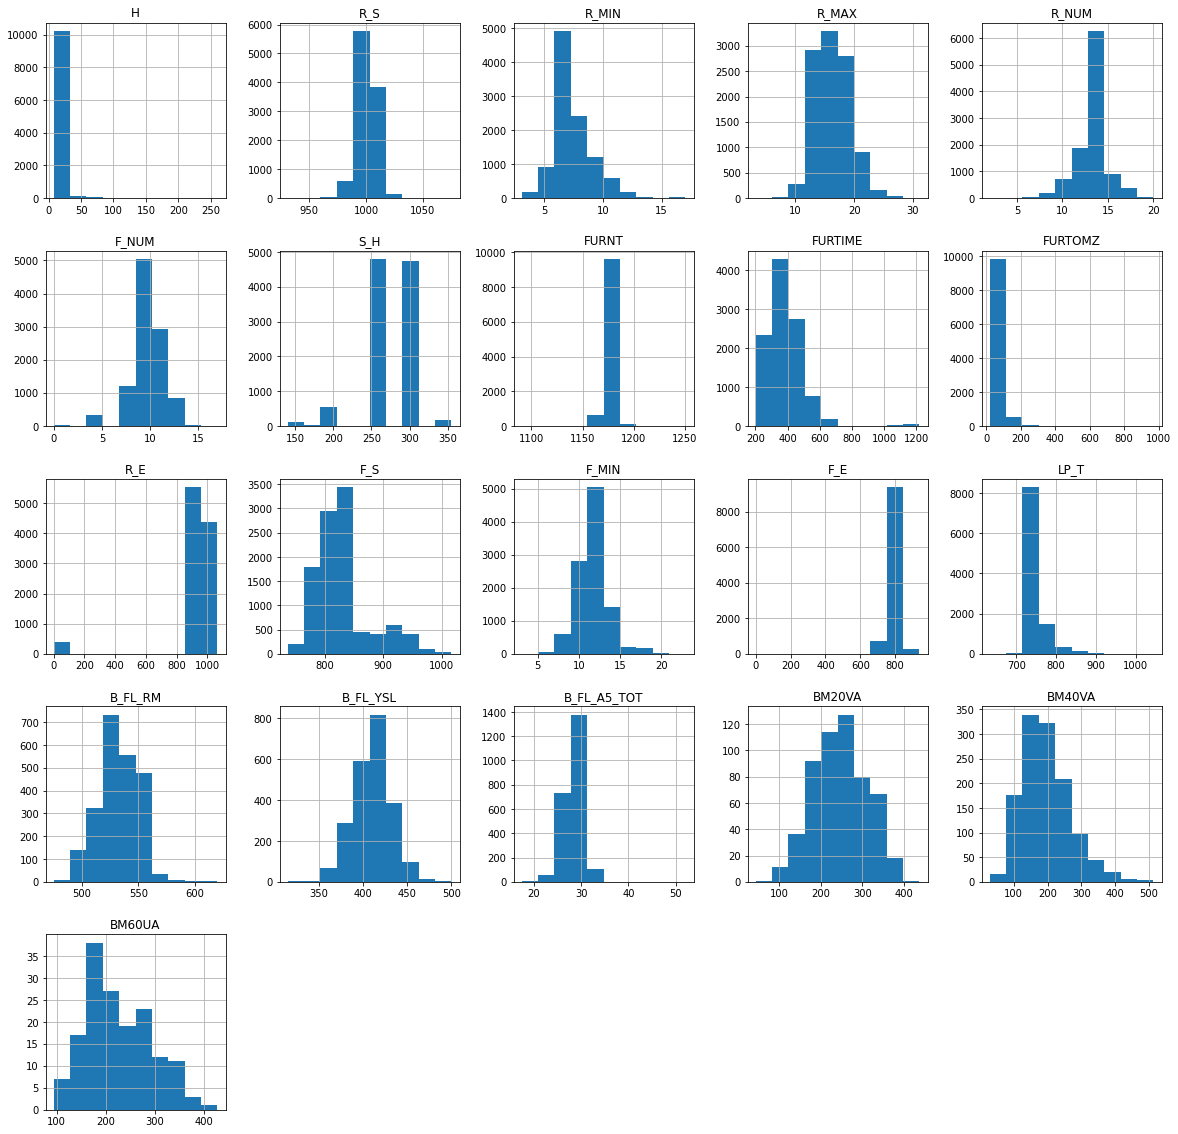

In [26]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data1.hist(ax = ax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2db0375290>,
      dtype=object)

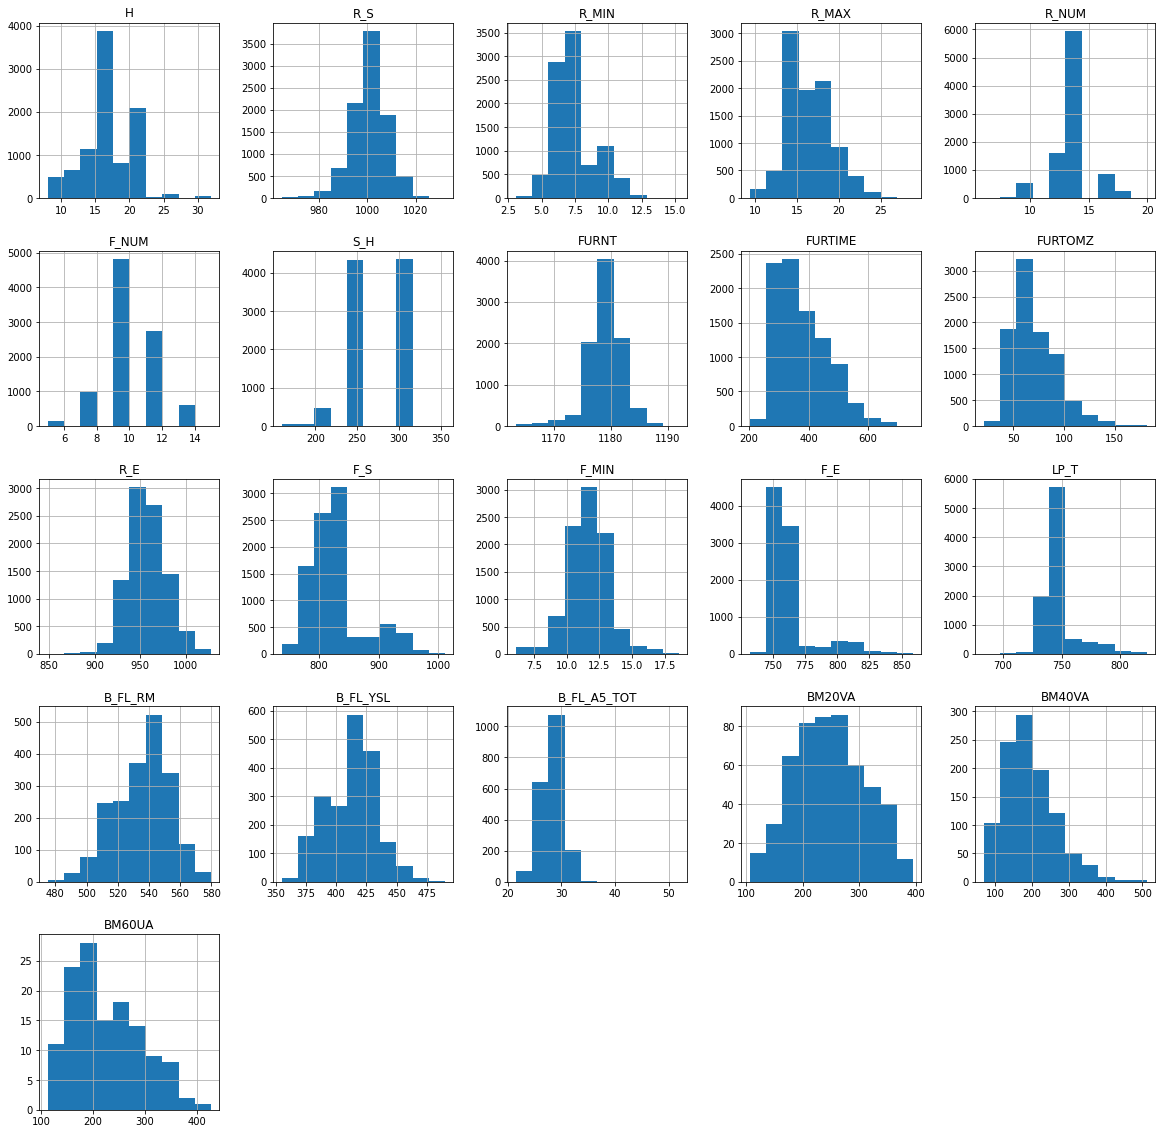

In [27]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_IQR_new.hist(ax = ax)

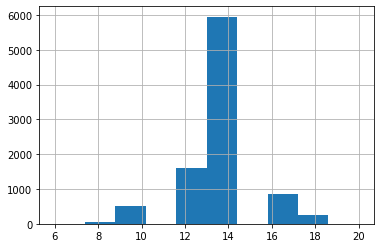

In [28]:
df_IQR_new["R_NUM"].hist() # не влияет на анализ, удаляем этот столбец? ДА!

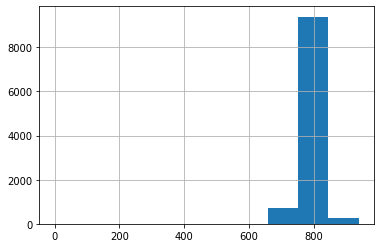

In [29]:
data1.F_E.hist() 

In [30]:
print("B_FL_RM")
print("Кол-во строк в массиве: ", df_IQR_new["B_FL_RM"].shape)
print("Кол-во Nun: ", df_IQR_new["B_FL_RM"].isna().sum(), "\n")

print("B_FL_YSL")
print(df_IQR_new["B_FL_YSL"].shape)
print(df_IQR_new["B_FL_YSL"].isna().sum(), "\n")

print("B_FL_A5_TOT")
print('Всего', df_IQR_new["B_FL_A5_TOT"].shape)
print('Отсутствуют', df_IQR_new["B_FL_A5_TOT"].isna().sum(), "\n")

print("B_FL_YSL")
print(df_IQR_new["BM20VA"].shape)
print(df_IQR_new["BM20VA"].isna().sum(), "\n")

print("BM40VA")
print(df_IQR_new["BM40VA"].shape)
print(df_IQR_new["BM40VA"].isna().sum(), "\n")

print("BM60UA")
print(df_IQR_new["BM60UA"].shape)
print(df_IQR_new["BM60UA"].isna().sum(), "\n")


B_FL_RM
Кол-во строк в массиве:  (9245,)
Кол-во Nun:  7249 

B_FL_YSL
(9245,)
7254 

B_FL_A5_TOT
Всего (9245,)
Отсутствуют 7249 

B_FL_YSL
(9245,)
8721 

BM40VA
(9245,)
8189 

BM60UA
(9245,)
9115 



  Алгоритмы обучения:
*   Linear Regression
*   Random Rorest
*   XGboost
*   LassoCV
*   RidgeCV
*   ElasticNetCV

### 1. y = B_FL_RM - временное сопротивление, в середине, плоский образец, поперечный (без выбросов)


In [31]:
df_IQR_new

,H,R_S,R_MIN,R_MAX,R_NUM,F_NUM,S_H,FURNT,FURTIME,FURTOMZ,R_E,F_S,F_MIN,F_E,LP_T,B_FL_RM,B_FL_YSL,B_FL_A5_TOT,BM20VA,BM40VA,BM60UA
5,10.0,1006.9,10.17,25.60,10.0,7.0,250.0,1169.1,244.0,36.0,1013.7,1001.9,11.96,842.5,789.0,520.0,375.0,29.0,NaN,NaN,NaN
6,10.0,1005.5,10.17,25.75,10.0,7.0,250.0,1169.1,247.0,41.0,1018.7,1000.9,11.71,838.5,778.3,NaN,NaN,NaN,NaN,NaN,NaN
7,10.0,1005.0,10.12,25.75,10.0,7.0,250.0,1171.7,251.0,36.0,1006.0,996.1,11.60,833.4,775.7,NaN,NaN,NaN,NaN,NaN,NaN
8,10.0,1015.7,10.19,25.64,10.0,7.0,250.0,1172.0,253.0,42.0,1012.6,994.5,11.43,831.8,771.8,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,1012.5,10.24,25.87,10.0,7.0,250.0,1174.1,251.0,38.0,1015.1,1012.0,11.34,835.7,783.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10403,16.0,1009.9,6.03,18.82,14.0,9.0,250.0,1177.3,295.0,46.0,941.9,837.7,11.27,768.0,748.4,NaN,NaN,NaN,NaN,NaN,NaN
10404,10.0,1007.6,12.33,15.92,10.0,7.0,200.0,1171.7,266.0,38.0,967.7,963.2,11.22,758.1,728.9,540.0,430.0,27.0,NaN,NaN,NaN
10405,10.0,1009.1,12.53,15.77,10.0,7.0,200.0,1172.7,268.0,43.0,962.0,956.1,10.42,760.1,741.6,530.0,420.0,28.0,NaN,NaN,NaN
10406,10.0,1016.4,12.45,15.77,10.0,7.0,200.0,1183.1,267.0,39.0,969.2,957.6,11.84,767.5,738.0,530.0,410.0,28.0,NaN,NaN,NaN


In [32]:
data_x = df_IQR_new.copy(deep=True)
list_y = ['B_FL_RM','B_FL_YSL', 'B_FL_A5_TOT', 'BM20VA', 'BM40VA','BM60UA']
for i in list_y:
  del data_x[i]

data_y = pd.DataFrame()
data_y[['B_FL_RM', 'B_FL_YSL', 'B_FL_A5_TOT', 'BM20VA', 'BM40VA','BM60UA']] = df_IQR_new[['B_FL_RM', 'B_FL_YSL', 'B_FL_A5_TOT', 'BM20VA', 'BM40VA','BM60UA']]

In [33]:
data_x[["B_FL_RM"]] = data_y[["B_FL_RM"]]
# все х усредненные значения, исключены строки где у=Nun 
data_x = data_x[df_IQR_new["B_FL_RM"].notna()]
# разбиваем на х и у
y=data_x["B_FL_RM"]
del data_x["B_FL_RM"]
x=data_x

In [34]:
# разбиваем на тестовую и тренировочные выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

# алгоритм линейная регрессия L(1+)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# прогнозируем результаты 
y_pred = regressor.predict(X_test)

# метрика "Объяснимая дисперсия" измеряет степень, в которой модель учитывает вариацию целевой переменной. случайная изменчивость и целенаправлеенная 
# Это процент уменьшения дисперсии исходных данных по отношению к дисперсии ошибок"
from sklearn.metrics import r2_score
print("Линейная регрессия:" "\n" "Точность = ",r2_score(y_test, y_pred))

# MSE средняя квадратическая ошибка
from sklearn.metrics import mean_squared_error
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))    


Линейная регрессия:
Точность =  0.5250057710935544
MSE =  12.016447364067135
RMSE =  3.4664747747628475


In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("\n" "Random Forest:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))


Random Forest:
Точность =  0.7060177743291949
MSE =  9.453496302550839
RMSE =  3.0746538508506673


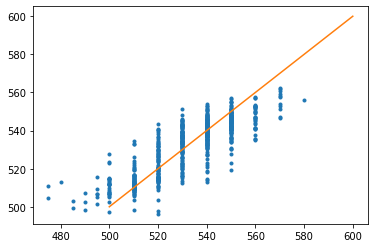

In [36]:
y_pred = regressor.predict(X_test)
plt.plot(y_test, y_pred, '.')

x=np.linspace(500,600)
y=x
plt.plot(x,y)
plt.show()

# Подбор гиперпараметров для RandomForest

In [37]:
val_score = []
for i in range(1, 25):
  clf = RandomForestRegressor(max_depth = i)
  clf.fit(X_train, y_train) 
  y_pred = clf.predict(X_test)
  #mse_score = mean_squared_error(y_test, y_pred, squared=False)
  #val_score.append(mse_score)
  r2 = r2_score(y_test, y_pred)
  val_score.append(r2)

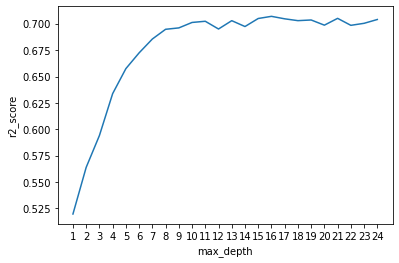

In [38]:
plt.plot(list(range(1, 25)), val_score)
plt.xticks(list(range(1, 25)))
plt.xlabel("max_depth")
plt.ylabel("r2_score")
#plt.ylabel("mse_score")
plt.show()

In [39]:
val_score = []
for i in range(100, 1500, 100):
  clf = RandomForestRegressor(n_estimators = i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  #mse_score = mean_squared_error(y_test, y_pred, squared=False)
  #val_score.append(mse_score)
  r2 = r2_score(y_test, y_pred)
  val_score.append(r2)

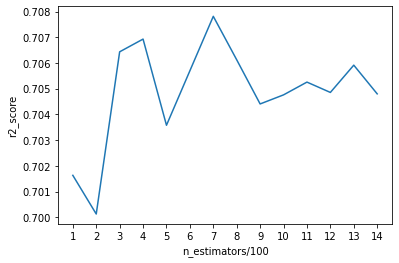

In [40]:
plt.plot(list(range(1, 15)), val_score)
plt.xticks(list(range(1, 15)))
plt.xlabel("n_estimators/100")
plt.ylabel("r2_score")
plt.show()

In [41]:
clf = RandomForestRegressor()
parametres = {
              'max_depth': [9, 14, 20, 23],
              'n_estimators': [400, 1000]
}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
cv_clf = GridSearchCV(clf, parametres, cv=5, scoring='neg_mean_squared_error', 
                     n_jobs=-1, verbose=10) 

In [44]:
%%time
best_clf = cv_clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 4.88 s, sys: 219 ms, total: 5.1 s
Wall time: 2min 40s


In [45]:
best_clf.best_params_

{'max_depth': 20, 'n_estimators': 400}

In [46]:
model = RandomForestRegressor(max_depth = 14, n_estimators=400, criterion = 'squared_error')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n" "Random Forest:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))


Random Forest:
Точность =  0.702991197318404
MSE =  9.502034051693633
RMSE =  3.08253695058042


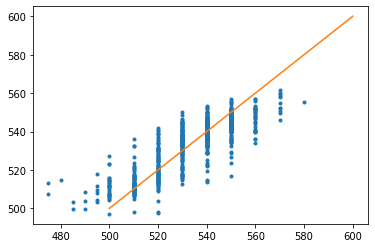

In [47]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '.')

x=np.linspace(500,600)
y=x
plt.plot(x,y)
plt.show()

## Попытка улучшить за счёт других параметров

In [48]:
val_score = []
for i in range(2, 10):
  clf = RandomForestRegressor(min_samples_split = i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  #mse_score = mean_squared_error(y_test, y_pred, squared=False)
  #val_score.append(mse_score)
  r2 = r2_score(y_test, y_pred)
  val_score.append(r2)

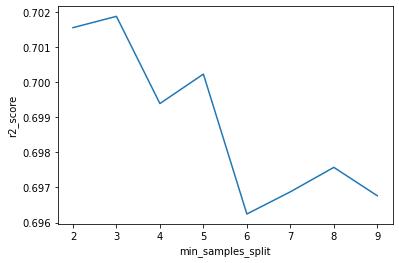

In [49]:
plt.plot(list(range(2, 10)), val_score)
plt.xticks(list(range(2, 10)))
plt.xlabel("min_samples_split")
plt.ylabel("r2_score")
plt.show()

In [50]:
val_score = []
for i in range(1, 6):
  clf = RandomForestRegressor(min_samples_leaf = i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  #mse_score = mean_squared_error(y_test, y_pred, squared=False)
  #val_score.append(mse_score)
  r2 = r2_score(y_test, y_pred)
  val_score.append(r2)

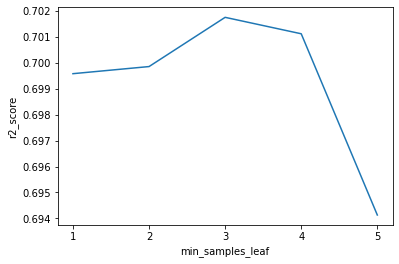

In [51]:
plt.plot(list(range(1, 6)), val_score)
plt.xticks(list(range(1, 6)))
plt.xlabel("min_samples_leaf")
plt.ylabel("r2_score")
plt.show()

In [52]:
clf = RandomForestRegressor()
parametres = {
              'min_samples_leaf': [1, 3],
              #'mse_score': range (3, 5, 1)
              'min_samples_split': [4, 7]
}

In [53]:
cv_clf = GridSearchCV(clf, parametres, cv=5, scoring='neg_mean_squared_error', 
                     n_jobs=-1, verbose=10) 

In [54]:
%%time
best_clf = cv_clf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: user 1.13 s, sys: 13 ms, total: 1.14 s
Wall time: 11.7 s


In [55]:
best_clf.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 4}

In [56]:
model = RandomForestRegressor(max_depth = 14, n_estimators=400, min_samples_split=4, criterion = 'squared_error')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n" "Random Forest:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))


Random Forest:
Точность =  0.7019688904637105
MSE =  9.518373045519064
RMSE =  3.085186063354861


In [57]:
# XGBoost - алгоритм градиентного бустинга деревьев решений.

import xgboost as xgb
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold

clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1, gamma=0, colsample_bytree=0.6, subsample=0.6, learning_rate=0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

print("XGboost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

XGboost:
Точность =  0.5649746362301429
MSE =  11.499771508371143


In [58]:
# Гребневая регрессия (ридж-регрессия) - один из методов понижения размерности. 
# Применяется для борьбы с избыточностью данных, когда независимые переменные коррелируют друг с другом, вследствие чего проявляется неустойчивость оценок коэффициентов многомерной линейной регрессии.

from sklearn.linear_model import RidgeCV
model = RidgeCV()
model.fit(X_train, y_train)

# прогнозируем результаты 
y_pred = model.predict(X_test)
print("Ridge:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

Ridge:
Точность =  0.5251029761461491
MSE =  12.015217750008325
RMSE =  3.466297412226528


In [59]:
# ElasticNet стремится объединить лучшее из гребневой регрессии и регрессии лассо, комбинируя регуляризацию L1 и L2

from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV()
model.fit(X_train, y_train)

# прогнозируем результаты 
y_pred = model.predict(X_test)
print("ElasticNet:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

ElasticNet:
Точность =  0.5213686402352855
MSE =  12.06236586402945
RMSE =  3.473091686671898


# CatBoost

In [60]:
!pip install catboost
#import catboost as cb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor(loss_function = 'RMSE')
# Fit model
#model.fit(X_train, y_train)
model.fit(X_train, y_train,
          use_best_model=True, plot=True, verbose=False)

print("Count of trees in model = {}".format(model.tree_count_))

# прогнозируем результаты 
y_pred = model.predict(X_test)

print("CatBoost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Count of trees in model = 1000
CatBoost:
Точность =  0.7179643263279147
MSE =  9.25942341519623
RMSE =  3.0429300707042595


In [62]:
cat = CatBoostRegressor()
#cat.fit(X_train,y_train,verbose=False, plot=True)
grid = {'learning_rate': [0.03, 0.1]}

grid_search_result = cat.grid_search(grid, X=X_train, y=y_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
26:	learn: 245.6934409	test: 245.6685697	best: 245.6685697 (26)	total: 98.6ms	remaining: 3.55s
27:	learn: 238.7748173	test: 238.7922557	best: 238.7922557 (27)	total: 102ms	remaining: 3.54s
28:	learn: 232.0296408	test: 232.1864267	best: 232.1864267 (28)	total: 105ms	remaining: 3.53s
29:	learn: 225.4961675	test: 225.7020693	best: 225.7020693 (29)	total: 109ms	remaining: 3.52s
30:	learn: 219.2930327	test: 219.5536328	best: 219.5536328 (30)	total: 112ms	remaining: 3.51s
31:	learn: 213.1080082	test: 213.3564056	best: 213.3564056 (31)	total: 116ms	remaining: 3.51s
32:	learn: 207.1689624	test: 207.5632677	best: 207.5632677 (32)	total: 120ms	remaining: 3.51s
33:	learn: 201.1996378	test: 201.6091812	best: 201.6091812 (33)	total: 123ms	remaining: 3.5s
34:	learn: 195.4609088	test: 195.8674061	best: 195.8674061 (34)	total: 126ms	remaining: 3.49s
35:	learn: 189.8755892	test: 190.2802186	best: 190.2802186 (35)	total: 130ms	remaining

Нейросеть

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [93]:
x_train = X_train
x_test = X_test
y_tr = y_train
y_te = y_test
def norm(x):
  return (x - mean) / std
x_train = norm(x_train);
x_test = norm(x_test);

In [94]:
# Приводим значения ответов в диапазон от 0 до 1
min_y = y_tr.min()
y_tr = y_tr - min_y #смещаем ответы к 0, вычитая минимальное значение
max_y = y_tr.max() #берем максимум от уже "опущенных" вниз на min_y данных 
y_tr /= max_y #приводим к 1 обучающую выборку
#нормируем ответы проверочной выборки, используя статистику min_y и max_y обучающей 
y_te = y_te - min_y
y_te /= max_y

In [103]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid, т.к. данные от 0 до 1
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

history = model.fit(x_train, 
                    y_tr, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)

In [98]:
pred = model.predict(x_test).flatten() 
# Возвращаем к прежнему размеру
pred = pred * max_y + min_y 
y_te = y_te * max_y + min_y

21/21 [==============================] - 0s 2ms/step


In [99]:
err = np.mean(abs(pred - y_te))
print(err)

18.718106289883632


### 2. y = B_FL_YSL - нижний предел текучести, на середине, плоский образец, поперечный

In [119]:
data_x[["B_FL_YSL"]] = data_y[["B_FL_YSL"]]
# все х усредненные значения, исключены строки где у=Nun 
data_x = data_x[df_IQR_new["B_FL_YSL"].notna()]
# разбиваем на х и у
y=data_x["B_FL_YSL"]
del data_x["B_FL_YSL"]
x=data_x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
from sklearn.linear_model import LassoCV

In [121]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Линейная регрессия:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))


regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("\n" "Random Forest:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1, gamma=0, colsample_bytree=0.6, subsample=0.6, learning_rate=0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

print("\n" "XGboost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

model = LassoCV()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" "Lasso:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

model = RidgeCV()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" "Ridge:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

model = ElasticNetCV()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" "ElasticNetCV:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))


Линейная регрессия:
Точность =  0.5484511380701637
MSE =  13.297032410340766
RMSE =  3.6465096202177727

Random Forest:
Точность =  0.7067377620250026
MSE =  10.715943707774542
RMSE =  3.273521606431603

XGboost:
Точность =  0.5275955381661034
MSE =  13.600640045180013
RMSE =  3.6879045602048888

Lasso:
Точность =  0.5467939396175887
MSE =  13.32141032640622
RMSE =  3.6498507265922835

Ridge:
Точность =  0.54844663766576
MSE =  13.297098673240704
RMSE =  3.646518706004496

ElasticNetCV:
Точность =  0.5432039671924416
MSE =  13.374067569240697
RMSE =  3.6570572280510865


In [ ]:
val_score = []
for i in range(1, 25):
  clf = RandomForestRegressor(max_depth = i)
  clf.fit(X_train, y_train) 
  y_pred = clf.predict(X_test)
  mse_score = mean_squared_error(y_test, y_pred, squared=False)

  val_score.append(mse_score)

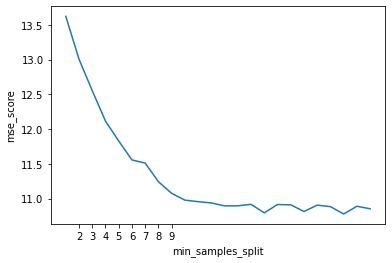

In [ ]:
plt.plot(list(range(1, 25)), val_score)
plt.xticks(list(range(2, 10)))
plt.xlabel("min_samples_split")
plt.ylabel("mse_score")
plt.show()

In [122]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor()
# Fit model
#model.fit(X_train, y_train)
model.fit(X_train, y_train,
          use_best_model=True, plot=True)

print("Count of trees in model = {}".format(model.tree_count_))

# прогнозируем результаты 
y_pred = model.predict(X_test)


print("CatBoost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.042815
0:	learn: 20.3129665	total: 3.51ms	remaining: 3.51s
1:	learn: 19.9254628	total: 7.26ms	remaining: 3.62s
2:	learn: 19.5320776	total: 10.6ms	remaining: 3.52s
3:	learn: 19.1824881	total: 14.2ms	remaining: 3.54s
4:	learn: 18.8534980	total: 17.7ms	remaining: 3.52s
5:	learn: 18.5335840	total: 21.2ms	remaining: 3.52s
6:	learn: 18.2435448	total: 24.4ms	remaining: 3.47s
7:	learn: 17.9437305	total: 27.7ms	remaining: 3.44s
8:	learn: 17.6635870	total: 31.1ms	remaining: 3.43s
9:	learn: 17.3960641	total: 34.4ms	remaining: 3.41s
10:	learn: 17.1382464	total: 43.7ms	remaining: 3.93s
11:	learn: 16.8844374	total: 47.8ms	remaining: 3.94s
12:	learn: 16.6659636	total: 51.3ms	remaining: 3.9s
13:	learn: 16.4762462	total: 54.9ms	remaining: 3.86s
14:	learn: 16.2794815	total: 58.3ms	remaining: 3.83s
15:	learn: 16.0995315	total: 61.5ms	remaining: 3.78s
16:	learn: 15.9423101	total: 64.8ms	remaining: 3.75s
17:	learn: 15.7697006	total: 68.1ms	remaining: 3.71s
18:	learn: 15.5800480	total

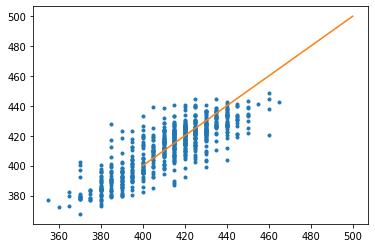

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '.')

x=np.linspace(400,500)
y=x
plt.plot(x,y)
plt.show()

In [104]:
x_train = X_train
x_test = X_test
y_tr = y_train
y_te = y_test
def norm(x):
  return (x - mean) / std
x_train = norm(x_train);
x_test = norm(x_test);

In [105]:
# Приводим значения ответов в диапазон от 0 до 1
min_y = y_tr.min()
y_tr = y_tr - min_y #смещаем ответы к 0, вычитая минимальное значение
max_y = y_tr.max() #берем максимум от уже "опущенных" вниз на min_y данных 
y_tr /= max_y #приводим к 1 обучающую выборку
#нормируем ответы проверочной выборки, используя статистику min_y и max_y обучающей 
y_te = y_te - min_y
y_te /= max_y

In [106]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid, т.к. данные от 0 до 1
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

history = model.fit(x_train, 
                    y_tr, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/100
38/38 - 1s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0112 - val_mse: 0.0112 - 864ms/epoch - 23ms/step
Epoch 2/100
38/38 - 0s - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0104 - val_mse: 0.0104 - 79ms/epoch - 2ms/step
Epoch 3/100
38/38 - 0s - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0099 - val_mse: 0.0099 - 93ms/epoch - 2ms/step
Epoch 4/100
38/38 - 0s - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0086 - val_mse: 0.0086 - 81ms/epoch - 2ms/step
Epoch 5/100
38/38 - 0s - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0082 - val_mse: 0.0082 - 86ms/epoch - 2ms/step
Epoch 6/100
38/38 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0101 - val_mse: 0.0101 - 92ms/epoch - 2ms/step
Epoch 7/100
38/38 - 0s - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0092 - val_mse: 0.0092 - 100ms/epoch - 3ms/step
Epoch 8/100
38/38 - 0s - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0074 - val_mse: 0.0074 - 80ms/epoch - 2ms/step
Epoch 9/100
38/38 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0076 - val_mse: 0.0076 - 93

In [107]:
pred = model.predict(x_test).flatten() 
# Возвращаем к прежнему размеру
pred = pred * max_y + min_y 
y_te = y_te * max_y + min_y

err = np.mean(abs(pred - y_te))
print(err)

21/21 [==============================] - 0s 1ms/step


In [108]:
err = np.mean(abs(pred - y_te))
print(err)

10.626741202480822


### 3. у = B_FL_A5_TOT - полное удлинение, на середине, плоский образец, поперечный


In [109]:
data_x[["B_FL_A5_TOT"]] = data_y[["B_FL_A5_TOT"]]
# все х усредненные значения, исключены строки где у=Nun 
data_x = data_x[df_IQR_new["B_FL_A5_TOT"].notna()]
# разбиваем на х и у
y=data_x["B_FL_A5_TOT"]
del data_x["B_FL_A5_TOT"]
x=data_x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [111]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Линейная регрессия:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("\n" "Random Forest:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1, gamma=0, colsample_bytree=0.6, subsample=0.6, learning_rate=0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

print("\n" "XGboost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

model = LassoCV()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" "Lasso:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

model = RidgeCV()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" "Ridge:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

model = ElasticNetCV()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" "Рандомный лес:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

Линейная регрессия:
Точность =  0.21984165506528675
MSE =  1.829105461238396

Random Forest:
Точность =  0.34098924672720066
MSE =  1.6811002699035769

XGboost:
Точность =  0.2112362593191225
MSE =  1.8391656044200935

Lasso:
Точность =  0.22374564744810865
MSE =  1.8245232058555818

Ridge:
Точность =  0.22002943473602776
MSE =  1.828885320356915

Рандомный лес:
Точность =  0.22363997807179337
MSE =  1.8246473853000145


In [118]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor()
# Fit model
#model.fit(X_train, y_train)
model.fit(X_train, y_train,
          use_best_model=True, plot=True)

print("Count of trees in model = {}".format(model.tree_count_))

# прогнозируем результаты 
y_pred = model.predict(X_test)


print("CatBoost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.042815
0:	learn: 1.8975493	total: 5.16ms	remaining: 5.15s
1:	learn: 1.8739313	total: 8.18ms	remaining: 4.08s
2:	learn: 1.8509468	total: 11.1ms	remaining: 3.69s
3:	learn: 1.8308202	total: 14.1ms	remaining: 3.5s
4:	learn: 1.8112363	total: 17.2ms	remaining: 3.42s
5:	learn: 1.7939121	total: 20.3ms	remaining: 3.37s
6:	learn: 1.7787352	total: 24ms	remaining: 3.4s
7:	learn: 1.7632383	total: 27.4ms	remaining: 3.39s
8:	learn: 1.7485584	total: 30.8ms	remaining: 3.39s
9:	learn: 1.7352547	total: 35.4ms	remaining: 3.51s
10:	learn: 1.7186518	total: 38.8ms	remaining: 3.49s
11:	learn: 1.7048597	total: 42.4ms	remaining: 3.49s
12:	learn: 1.6935750	total: 45.7ms	remaining: 3.47s
13:	learn: 1.6791853	total: 49ms	remaining: 3.45s
14:	learn: 1.6665670	total: 52.4ms	remaining: 3.44s
15:	learn: 1.6521734	total: 55.9ms	remaining: 3.44s
16:	learn: 1.6425352	total: 59.4ms	remaining: 3.44s
17:	learn: 1.6306599	total: 62.8ms	remaining: 3.43s
18:	learn: 1.6186817	total: 66.1ms	remaining: 3.41

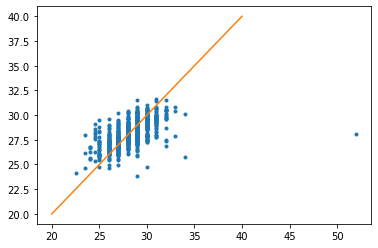

In [113]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '.')

x=np.linspace(20,40)
y=x
plt.plot(x,y)
plt.show()

In [114]:
x_train = X_train
x_test = X_test
y_tr = y_train
y_te = y_test
def norm(x):
  return (x - mean) / std
x_train = norm(x_train);
x_test = norm(x_test);

In [115]:
# Приводим значения ответов в диапазон от 0 до 1
min_y = y_tr.min()
y_tr = y_tr - min_y #смещаем ответы к 0, вычитая минимальное значение
max_y = y_tr.max() #берем максимум от уже "опущенных" вниз на min_y данных 
y_tr /= max_y #приводим к 1 обучающую выборку
#нормируем ответы проверочной выборки, используя статистику min_y и max_y обучающей 
y_te = y_te - min_y
y_te /= max_y

In [116]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid, т.к. данные от 0 до 1
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

history = model.fit(x_train, 
                    y_tr, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/100
38/38 - 1s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0157 - val_mse: 0.0157 - 1s/epoch - 32ms/step
Epoch 2/100
38/38 - 0s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0174 - val_mse: 0.0174 - 134ms/epoch - 4ms/step
Epoch 3/100
38/38 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0144 - val_mse: 0.0144 - 139ms/epoch - 4ms/step
Epoch 4/100
38/38 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0148 - val_mse: 0.0148 - 125ms/epoch - 3ms/step
Epoch 5/100
38/38 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0152 - val_mse: 0.0152 - 129ms/epoch - 3ms/step
Epoch 6/100
38/38 - 0s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0130 - val_mse: 0.0130 - 117ms/epoch - 3ms/step
Epoch 7/100
38/38 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0134 - val_mse: 0.0134 - 148ms/epoch - 4ms/step
Epoch 8/100
38/38 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0146 - val_mse: 0.0146 - 132ms/epoch - 3ms/step
Epoch 9/100
38/38 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0131 - val_mse: 0.0131 -

In [117]:
pred = model.predict(x_test).flatten() 
# Возвращаем к прежнему размеру
pred = pred * max_y + min_y 
y_te = y_te * max_y + min_y

err = np.mean(abs(pred - y_te))
print(err)

21/21 [==============================] - 0s 2ms/step
1.3151615096862057


### 5. у = BM40VA - ударная вязкость V -40 (надрез), поперечное, среднее, на середине

In [126]:
data_x[["BM40VA"]] = data_y[["BM40VA"]]
# все х усредненные значения, исключены строки где у=Nun 
data_x = data_x[df_IQR_new["BM40VA"].notna()]
# разбиваем на х и у
y=data_x["BM40VA"]
del data_x["BM40VA"]
x=data_x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [127]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Линейная регрессия:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE =", mean_squared_error(y_test, y_pred, squared=False))

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("\n" "Random Forest:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1, gamma=0, colsample_bytree=0.6, subsample=0.6, learning_rate=0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

print("\n" "XGboost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

model = LassoCV()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" "Lasso:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

model = RidgeCV()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" "Ridge:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

model = ElasticNetCV()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n" "Рандомный лес:" "\n" "Точность=",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))
# результат плохой, тк мало данных 549/10400

Линейная регрессия:
Точность =  -0.3733644958361486
MSE = 34.919613903245846

Random Forest:
Точность =  0.027569567592376498
MSE =  29.383653640246983

XGboost:
Точность =  -0.0052062362206497514
MSE =  29.87473849257931

Lasso:
Точность =  0.1302244696456326
MSE =  27.789460654215834

Ridge:
Точность =  -0.35222195312111193
MSE =  34.6497827869424

Рандомный лес:
Точность= 0.10015147652328726
MSE =  28.265796599480357


In [128]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor()
# Fit model
#model.fit(X_train, y_train)
model.fit(X_train, y_train,
          use_best_model=True, plot=True)

print("Count of trees in model = {}".format(model.tree_count_))

# прогнозируем результаты 
y_pred = model.predict(X_test)


print("CatBoost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.024422
0:	learn: 44.3157918	total: 4.7ms	remaining: 4.7s
1:	learn: 43.9602486	total: 9.06ms	remaining: 4.52s
2:	learn: 43.5827946	total: 13.2ms	remaining: 4.4s
3:	learn: 43.2193296	total: 17.1ms	remaining: 4.25s
4:	learn: 42.9188161	total: 18.1ms	remaining: 3.6s
5:	learn: 42.5034185	total: 19.7ms	remaining: 3.26s
6:	learn: 42.1630880	total: 20.6ms	remaining: 2.93s
7:	learn: 41.7944179	total: 21.3ms	remaining: 2.64s
8:	learn: 41.5014947	total: 22.1ms	remaining: 2.43s
9:	learn: 41.1551898	total: 22.7ms	remaining: 2.25s
10:	learn: 40.8116163	total: 23.7ms	remaining: 2.13s
11:	learn: 40.5241417	total: 24.4ms	remaining: 2.01s
12:	learn: 40.1876676	total: 25.1ms	remaining: 1.91s
13:	learn: 39.9034392	total: 25.8ms	remaining: 1.82s
14:	learn: 39.6289171	total: 26.8ms	remaining: 1.76s
15:	learn: 39.3481623	total: 27.4ms	remaining: 1.68s
16:	learn: 39.0630361	total: 28.1ms	remaining: 1.63s
17:	learn: 38.7991469	total: 28.9ms	remaining: 1.58s
18:	learn: 38.4774108	total: 2

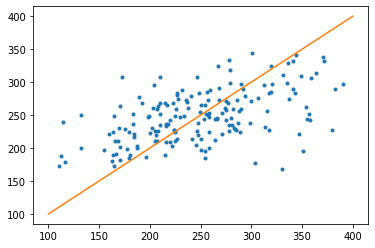

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '.')

x=np.linspace(100,400)
y=x
plt.plot(x,y)
plt.show()

In [129]:
x_train = X_train
x_test = X_test
y_tr = y_train
y_te = y_test
def norm(x):
  return (x - mean) / std
x_train = norm(x_train);
x_test = norm(x_test);

In [130]:
# Приводим значения ответов в диапазон от 0 до 1
min_y = y_tr.min()
y_tr = y_tr - min_y #смещаем ответы к 0, вычитая минимальное значение
max_y = y_tr.max() #берем максимум от уже "опущенных" вниз на min_y данных 
y_tr /= max_y #приводим к 1 обучающую выборку
#нормируем ответы проверочной выборки, используя статистику min_y и max_y обучающей 
y_te = y_te - min_y
y_te /= max_y

In [131]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid, т.к. данные от 0 до 1
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

history = model.fit(x_train, 
                    y_tr, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/100
2/2 - 1s - loss: 0.0773 - mse: 0.0773 - val_loss: 0.1269 - val_mse: 0.1269 - 783ms/epoch - 392ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0309 - mse: 0.0309 - val_loss: 0.1010 - val_mse: 0.1010 - 42ms/epoch - 21ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0944 - val_mse: 0.0944 - 27ms/epoch - 13ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0913 - val_mse: 0.0913 - 33ms/epoch - 17ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0841 - val_mse: 0.0841 - 28ms/epoch - 14ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0855 - val_mse: 0.0855 - 30ms/epoch - 15ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0808 - val_mse: 0.0808 - 26ms/epoch - 13ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0777 - val_mse: 0.0777 - 33ms/epoch - 16ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0760 - val_mse: 0.0760 - 26ms/epoch - 

In [132]:
pred = model.predict(x_test).flatten() 
# Возвращаем к прежнему размеру
pred = pred * max_y + min_y 
y_te = y_te * max_y + min_y

err = np.mean(abs(pred - y_te))
print(err)

1/1 [==============================] - 0s 60ms/step
22.674783325195314


Объяснимая дисперсия - изменчивость вызывается двумя причинами:

*  случайная изменчивость (не интересует нас)
*  целенаправленная изменчивость (создана самим физич. процессом), то есть если модель верная, то она физ. процесс описывает верно, и изменчивость, связанная с изменением параметров физ процесса, должна быть больше, чем дисперсия случайных отклонений. иначе модель плохая


# XGboost - настройка гиперпараметров

In [ ]:
data_x = df_IQR_new.copy(deep=True)
list_y = ['B_FL_RM','B_FL_YSL', 'B_FL_A5_TOT', 'BM20VA', 'BM40VA','BM60UA']
for i in list_y:
  del data_x[i]

data_y = pd.DataFrame()
data_y[['B_FL_RM', 'B_FL_YSL', 'B_FL_A5_TOT', 'BM20VA', 'BM40VA','BM60UA']] = df_IQR_new[['B_FL_RM', 'B_FL_YSL', 'B_FL_A5_TOT', 'BM20VA', 'BM40VA','BM60UA']]

In [ ]:
data_x[["B_FL_RM"]] = data_y[["B_FL_RM"]]
# все х усредненные значения, исключены строки где у=Nun 
data_x = data_x[df_IQR_new["B_FL_RM"].notna()]
# разбиваем на х и у
y=data_x["B_FL_RM"]
del data_x["B_FL_RM"]
x=data_x

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [ ]:
clf = xgb.XGBClassifier()

In [ ]:
param_test1 = {  
              'max_depth':range(3,10,2),  
              'min_child_weight':range(1,6,2)  
}  

In [ ]:
cv_clf = GridSearchCV(clf, param_test1, cv=StratifiedKFold(n_splits=2, shuffle=True), scoring="precision", n_jobs=-1)

In [ ]:
best_clf = cv_clf.fit(X_train, y_train)
best_clf

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=True),
             estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='precision')

In [ ]:
best_clf.best_params_

{'max_depth': 3, 'min_child_weight': 1}

In [ ]:
clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1)

In [ ]:
print("XGboost:" "\n" "Точность = ",r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

ValueError: ignored

In [ ]:
param_test2 = {  
   'gamma': [i / 10.0 for i in range(0, 5)]  
}  

In [ ]:
cv_clf = GridSearchCV(clf, param_test2, cv=StratifiedKFold(n_splits=2, shuffle=True), scoring="precision", n_jobs=-1)

In [ ]:
best_clf = cv_clf.fit(X_train, y_train)
best_clf.best_params_

In [ ]:
clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1, gamma=0)

In [ ]:
print("XGboost:" "\n" "Точность = ",explained_variance_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

In [ ]:
param_test3 = {  
   'subsample': [i / 10.0 for i in range(6, 10)],  
  'colsample_bytree': [i / 10.0 for i in range(6, 10)]  
}  

In [ ]:
cv_clf = GridSearchCV(clf, param_test3, cv=StratifiedKFold(n_splits=2, shuffle=True), scoring="precision", n_jobs=-1)

In [ ]:
best_clf = cv_clf.fit(X_train, y_train)
best_clf.best_params_

In [ ]:
clf = xgb.XGBClassifier(learning_rate=0.01, n_estimators=1000, objective='binary:logistic',
                  silent=True, nthread=1, max_depth = 3)

In [ ]:
best_clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = best_clf.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
print("XGboost:" "\n" "Точность = ",explained_variance_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))

In [ ]:
clf = xgb.XGBClassifier(max_depth=3, min_child_weight=1, gamma=0, colsample_bytree=0.6, subsample=0.6, learning_rate=0.01)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred = best_clf.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
print("XGboost:" "\n" "Точность = ",explained_variance_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred, squared=False))